<a href="https://colab.research.google.com/github/mleyvaz/optimizacion/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [386]:
"""
La función de fitness a optimizar es la siguiente:
= $ 600,000- ((F + V) + $ 350,000)
Las variables F y V están vinculadas a nuestro individuo GA y para este problema representa la Cantidad (número de artículos a producir). 600.000 son ingresos totales y 350.000 son gastos adicionales.
Ecuación F = (20,000 / Cantidad) * $ 6000 y representa la tarifa fija por una corrida de producción. Cada corrida nos cuesta 6.000 dólares.
Ecuación V = (Cantidad * $ 6) / 2 y representa la cantidad de dinero que cuesta una producción en particular."""

'\nLa función de fitness a optimizar es la siguiente:\n= $ 600,000- ((F + V) + $ 350,000)\nLas variables F y V están vinculadas a nuestro individuo GA y para este problema representa la Cantidad (número de artículos a producir). 600.000 son ingresos totales y 350.000 son gastos adicionales.\nEcuación F = (20,000 / Cantidad) * $ 6000 y representa la tarifa fija por una corrida de producción. Cada corrida nos cuesta 6.000 dólares.\nEcuación V = (Cantidad * $ 6) / 2 y representa la cantidad de dinero que cuesta una producción en particular.'

In [387]:
!pip  install deap

In [388]:
import random
import numpy as np

from deap import base, creator, tools

# Fitness

In [389]:
def EOQ(individual):
    def to_int(b):
        return int(b, 2)
    
    i = to_int(
        ''.join((str(xi) for xi in individual)))
    
    if i == 0:
        return (-1)*350000
    
    f = round((20000 / i) * 6000, 0)
    v = (i * 6) / 2
    
    return 600000 - ( (f + v) + (350000) ),

In [390]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [391]:
tbx = base.Toolbox()

In [392]:
INDIVIDUAL_SIZE = 20
tbx.register("attr_int", random.randint, 0, 1)
tbx.register("individual", 
             tools.initRepeat, 
             creator.Individual,
             tbx.attr_int, 
             n=INDIVIDUAL_SIZE)

tbx.register("population", tools.initRepeat, list, tbx.individual)

In [393]:
# Fitness
tbx.register("evaluate", EOQ)
# Crossover
tbx.register("mate", tools.cxOnePoint)
# Mutacion, Probabilidad de mutación
tbx.register("mutate", tools.mutFlipBit, indpb=0.5)
# Seleccion , tournsize  : numerode individuos participando en el torneo
tbx.register("select", tools.selTournament, tournsize=5)

In [394]:
def set_fitness(population):
    fitnesses = [ 
        (individual, tbx.evaluate(individual)) 
        for individual in population 
    ]

    for individual, fitness in fitnesses:
        individual.fitness.values = fitness
        
def pull_stats(population, iteration=1):
    fitnesses = [ individual.fitness.values[0] for individual in population ]
    return {
        'i': iteration,
        'mu': np.mean(fitnesses),
        'std': np.std(fitnesses),
        'max': np.max(fitnesses),
        'min': np.min(fitnesses)
    }

In [395]:
## create random population,
population = tbx.population(n=10)

## set fitness,
set_fitness(population)

In [396]:
## quick look at the initial population,
population[:5]

[[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]]

In [397]:
## globals,
stats = []

In [398]:
# iteraciones (20)
iteration = 1
while iteration < 20:
    
    current_population = list(map(tbx.clone, population))
    
    offspring = []
    for _ in range(10):
        i1, i2 = np.random.choice(range(len(population)), size=2, replace=False)

        offspring1, offspring2 = \
            tbx.mate(population[i1], population[i2])

        offspring.append(tbx.mutate(offspring1)[0])
        offspring.append(tbx.mutate(offspring2)[0])  
    
    for child in offspring:
        current_population.append(child)

    ## reset fitness,
    set_fitness(current_population)

    population[:] = tbx.select(current_population, len(population))
    
    ## set fitness on individuals in the population,
    stats.append(
        pull_stats(population, iteration))
    
    iteration += 1

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

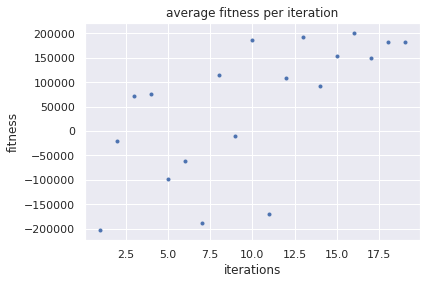

In [400]:

_ = plt.scatter(range(1, len(stats)+1), [ s['mu'] for s in stats ], marker='.')

_ = plt.title('average fitness per iteration')
_ = plt.xlabel('iterations')
_ = plt.ylabel('fitness')

plt.show()

In [401]:
def to_int(b):
    return int(b, 2)
    
sorted([ (i, to_int(''.join((str(xi) for xi in individual)))) for i, individual in enumerate(population) ][:10], key=lambda x: x[1], reverse=False)

[(0, 13197),
 (1, 13197),
 (3, 13197),
 (4, 13197),
 (5, 13197),
 (6, 13197),
 (7, 13197),
 (8, 13197),
 (9, 13197),
 (2, 82067)]